# HW 13 - Quantum Mechanics II

### Name: Mohamed Gamal Zaid
### ID: 201700399

In [2]:
import numpy as np
from numpy.random import randint as rand
import matplotlib.pyplot as plt
import time
from scipy.integrate import odeint
from scipy.linalg import eig
from matplotlib.pyplot import cm
import random


# Hamiltonian for 1D Problems

$$H\psi_n = E\psi_n = \dfrac{2\psi_n - \psi_{n+1} - \psi_{n-1} + 2{\Delta x}^2 V_n \psi_n }{2{\Delta x}^2}$$
$$\hat{H_n} =\dfrac{1}{{\Delta x}^2} \big(1+\Delta x^2 V_n \big) $$
$$\hat{H_{n+1}} =-\dfrac{1}{2{\Delta x}^2}$$
$$\hat{H_{n-1}} =-\dfrac{1}{2{\Delta x}^2}$$

# #2 Variational Method 

# Lennard-Jones Potential

1.9450050270011483
1.8278521653832853
1.43981661811379
-0.5321441203038503
-1.625562726541376
-1.9393223316797732
-1.9393223316797732


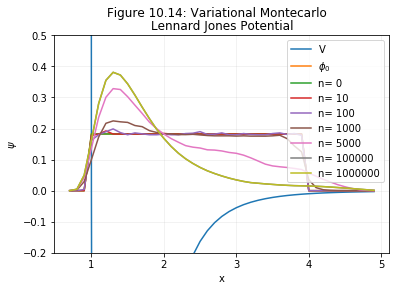

In [9]:
dx = 0.1
x=np.round(np.arange(0.7,5,dx),3)
lx = x.size

V = np.zeros(lx)
epsilon = 10
sigma = 1

phi0 = np.zeros(lx)
const=3


for i in range(lx):
    V[i] = 4*epsilon*(np.power(sigma/x[i],12) - np.power(sigma/x[i], 6))
    if x[i]>=1 and x[i]<4:
        phi0[i] = 3 

plt.figure()
plt.plot(x,V, label='V')

def Hamiltonian(V):
    H = np.zeros([lx,lx])
    for i in range(lx):    
        H[i,i] = 1/np.power(dx,2)+ V[i]
        if lx-i-1: H[i,i+1] = -1/(2*np.power(dx,2))
        if i: H[i,i-1] = -1/(2*np.power(dx,2))
    return H

H = Hamiltonian(V)

norm = np.dot(phi0,phi0)
phiNorm = phi0/np.sqrt(norm)
plt.plot(x, phiNorm, label=r'$\phi_0$')

engy = phiNorm.dot(H).dot(phiNorm)
engold = engy

phiNew = np.copy(phiNorm)
phiNorm1 = np.copy(phiNorm)

dphiRange = np.arange(-0.01, 0.011, 0.001)

N = 1000001
factor = 1

for n in range(N):
    phiNew = np.copy(phiNorm1)
    
    pos = np.where(x==np.random.choice(x))[0][0]
    dphi = np.random.choice(dphiRange)
    #pos= 3
    phiNew[pos] += dphi
    #phiNew[pos] = phiNorm[pos] + 1
        
    norm = phiNew.dot(phiNew)
    
    phiNorm = phiNew/np.sqrt(norm)
    
    engy = phiNorm.dot(H).dot(phiNorm)

    
    if engy > engold : 
        phiNorm = np.copy(phiNorm1)
    else:
        phiNorm1 = np.copy(phiNorm)
        engold = engy
    if (not n%factor) or n==5000:
        factor *=10
        print(engold)

        plt.plot(x, phiNorm1, label='n= '+str(n))
plt.ylim(-0.2,0.5)
plt.xlabel('x')
plt.ylabel(r'$\psi$')
plt.suptitle("Figure 10.14: Variational Montecarlo")
plt.title("Lennard Jones Potential")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

# #3 Problem 10.9 

# One Dimensional Square Well

10099.910000809992
10091.332916623704
10034.67222465522
6719.135900219526
4.504403676528119
1.2339618522269864


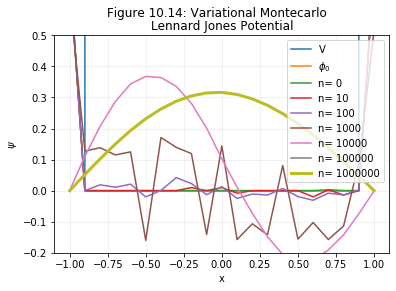

In [32]:
l=1
dx = 0.1
x=np.round(np.arange(-l,l+dx,dx),3)
lx = x.size


phi0 = np.zeros(lx)
const=3

V = np.zeros(lx)
VOutside = 10000
for i in range(lx):
    if x[i]<=-l or x[i]>=l: 
        V[i]=VOutside
        phi0[i] = const

plt.figure()
plt.plot(x,V, label='V')

def Hamiltonian(V):
    H = np.zeros([lx,lx])
    for i in range(lx):    
        H[i,i] = 1/np.power(dx,2)+ V[i]
        if lx-i-1: H[i,i+1] = -1/(2*np.power(dx,2))
        if i: H[i,i-1] = -1/(2*np.power(dx,2))
    return H

H = Hamiltonian(V)

norm = np.dot(phi0,phi0)
phiNorm = phi0/np.sqrt(norm)
plt.plot(x, phiNorm, label=r'$\phi_0$')

engy = phiNorm.dot(H).dot(phiNorm)
engold = engy

phiNew = np.copy(phiNorm)
phiNorm1 = np.copy(phiNorm)

dphiRange = np.arange(-0.01, 0.011, 0.001)

N = 1000001
factor = 1

for n in range(N):
    phiNew = np.copy(phiNorm1)
    
    pos = np.where(x==np.random.choice(x))[0][0]
    dphi = np.random.choice(dphiRange)
    #pos= 3
    phiNew[pos] += dphi
    #phiNew[pos] = phiNorm[pos] + 1
        
    norm = phiNew.dot(phiNew)
    
    phiNorm = phiNew/np.sqrt(norm)
    
    engy = phiNorm.dot(H).dot(phiNorm)

    
    if engy > engold : 
        phiNorm = np.copy(phiNorm1)
    else:
        phiNorm1 = np.copy(phiNorm)
        engold = engy
    if (not n%factor) and n!= (N-1):
        factor *=10
        print(engold)
        plt.plot(x, phiNorm1, label='n= '+str(n))
    if n == (N-1):
        plt.plot(x, phiNorm1, label='n= '+str(n),lw = 3)
        
plt.ylim(-0.2,0.5)
plt.xlabel('x')
plt.ylabel(r'$\psi$')
plt.suptitle("Figure 10.14: Variational Montecarlo")
plt.title("Lennard Jones Potential")
plt.grid(alpha=0.2)
plt.legend()

plt.show()

# Hamiltonian for Hydrogen Atom

$$\hat{H_n} = V_n + \dfrac{1}{{r}^2} + \dfrac{1}{{\Delta r}^2} $$
$$\hat{H_{n+1}} =-\dfrac{1}{2{\Delta r}^2}$$
$$\hat{H_{n-1}} =-\dfrac{1}{2{\Delta r}^2}$$


# #4 Matrix Method for Hydrogen Atom

In [7]:
l=10
dr = 0.01
r=np.round(np.arange(dr,l+dr,dr),3)
lr = r.size

def Hamiltonian(V):
    H = np.zeros([lr,lr])
    for i in range(lr):    
        #H[i,i] = 1/np.power(r[i],2)+1/np.power(dr,2)+ V[i]
        H[i,i] = 1/np.power(dr,2)+ V[i]
        if lr-i-1: H[i,i+1] = -1/(2*np.power(dr,2))
        if i: H[i,i-1] = -1/(2*np.power(dr,2))
    return H


V = np.zeros(lr)
for i in range(lr):
    V[i]=-1/r[i]

values, vectors = eig(Hamiltonian(V))
np.sort(values)[:2]

array([-0.49998678+0.j, -0.11287819+0.j])

In [39]:
E_exac = np.array([-(1/(2*np.power(n,2))) for n in range(1,3)])
E_exac

array([-0.5  , -0.125])

# Matrix Method for Quantum Harmonic Oscillator

In [36]:
l=1
dx = 0.01
x=np.round(np.arange(-l-1,l+1+dx,dx),3)
lx = x.size

def Hamiltonian(V):
    H = np.zeros([lx,lx])
    for i in range(lx):    
        H[i,i] = 1/np.power(dx,2)+ V[i]
        if lx-i-1: H[i,i+1] = -1/(2*np.power(dx,2))
        if i: H[i,i-1] = -1/(2*np.power(dx,2))
    return H


V = np.zeros(lx)
for i in range(lx):
    V[i]=np.power(x[i],2)/2

values, vectors = eig(Hamiltonian(V))
np.sort(values)[:2]

array([0.53613614+0.j, 1.75720359+0.j])

In [35]:
E_exac = np.array([(k+.5) for k in range(2)])
E_exac

array([0.5, 1.5])